In [ ]:
!pip install --quiet transformers
# import torch
# import tqdm
from transformers import BartForConditionalGeneration, BartTokenizer,BartConfig


     |████████████████████████████████| 4.0 MB 6.5 MB/s 
     |████████████████████████████████| 895 kB 30.1 MB/s 
     |████████████████████████████████| 6.6 MB 31.4 MB/s 
     |████████████████████████████████| 596 kB 33.8 MB/s 
     |████████████████████████████████| 77 kB 4.9 MB/s 


In [ ]:
import pandas as pd
!pip install --quiet datasets
# !pip install sacrebleu
!pip install rouge_score
# !pip install pyrouge
from datasets import Dataset,load_metric
!pip install -U nltk
import nltk
nltk.download('all')


     |████████████████████████████████| 325 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
     |████████████████████████████████| 212 kB 34.8 MB/s 
     |████████████████████████████████| 136 kB 37.8 MB/s 
     |████████████████████████████████| 127 kB 36.9 MB/s 
     |████████████████████████████████| 94 kB 1.3 MB/s 
     |████████████████████████████████| 271 kB 36.1 MB/s 
     |████████████████████████████████| 144 kB 35.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 749 kB 33.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
from datasets import load_dataset
dataset=load_dataset('GEM/cochrane-simplification')

Using custom data configuration default


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cochrane downloaded and prepared to /root/.cache/huggingface/datasets/GEM___cochrane/default/1.0.0/fd871e1bc42b6d9310e70d5667d5e874ed27d4ea7a6367f8042f1a2573deb2dd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# dataset['train']['source'][0]
import pandas as pd
df=pd.DataFrame(dataset['train'])

In [ ]:
dataset['train']

Dataset({
    features: ['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'],
    num_rows: 3568
})

In [ ]:
cd drive/My\ Drive/NLP-Written/Paragraph-level-Simplification-of-Medical-Texts/


[Errno 2] No such file or directory: 'drive/My Drive/NLP-Written/Paragraph-level-Simplification-of-Medical-Texts/'
/content/drive/My Drive


In [ ]:
df=pd.read_json('data/data_final_1024.json')

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
cd drive/My\ Drive


/content/drive/My Drive


In [ ]:
df=pd.DataFrame(pd.read_csv('data.csv'))
df = df.drop(labels=2267, axis=0)

In [ ]:
df.head()

,Unnamed: 0,source_text,target_text
0,0,"under conditions of high humidity , the rate o...","with a higher humidity , the rate of evaporati..."
1,1,"the lack of oxygen above 2,400 metres ( 8,000 ...",this can cause illnesses such as altitude sick...
2,2,the human body can adapt to high altitude by b...,the human body can deal with high altitude by ...
3,3,"for example , hemoglobin and myoglobin contain...","for example , hemoglobin and myoglobin contain..."
4,4,"schistosomiasis , caused by one genus of trema...","schistosomiasis , caused by one genus of trema..."


In [ ]:
train_data=Dataset.from_pandas(df[:1000])
val_data=Dataset.from_pandas(df[1000:2000])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
absTextCount=[]
plsTextCount=[]
for i in df['source']:
  absTextCount.append(len(i.split()))
for i in df['target']:
  plsTextCount.append(len(i.split()))
dfLength=pd.DataFrame({'abs':absTextCount,'pls':plsTextCount})


KeyError: ignored

In [ ]:
df.columns

Index(['Unnamed: 0', 'source_text', 'target_text'], dtype='object')

In [ ]:
absTextCount=[]
plsTextCount=[]
for i in range(len(df['source_text'])-1):
  absTextCount.append(len(df['source_text'][i].split()))
  plsTextCount.append(len(df['target_text'][i].split()))
dfLength=pd.DataFrame({'Source':absTextCount,'Target':plsTextCount})


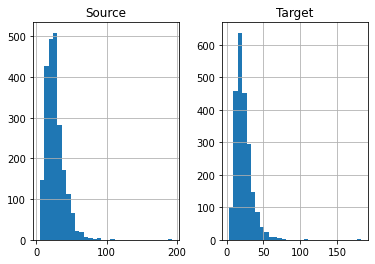

In [ ]:
dfLength.hist(bins=30)
plt.show()

In [ ]:
dfLength['abs'].max()

772

In [ ]:
tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-xsum')
# from transformers import PegasusTokenizerFast
# tokenizer=PegasusTokenizerFast.from_pretrained('google/pegasus-xsum')


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

In [ ]:
# tokenizer.to(decode)
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0): BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((102

In [ ]:
tokenizer.save_pretrained('bart-token')

('bart-token/tokenizer_config.json',
 'bart-token/special_tokens_map.json',
 'bart-token/vocab.json',
 'bart-token/merges.txt',
 'bart-token/added_tokens.json')

In [ ]:
# tokenizer.decode(tokenizer('hello how are you ')['input_ids'])

'<s>hello how are you</s>'

In [ ]:
# tokenizer.bos_token=tokenizer.cls_token
# tokenizer.eos_token=tokenizer.sep_token

In [ ]:
max_length_source=100
max_length_target=60
def preprocess_function(df):
  inputs=[abs for abs in df['source_text']]
  model_inputs=tokenizer(inputs,max_length=max_length_source,truncation=True,padding=True)
  with tokenizer.as_target_tokenizer():
    labels=tokenizer(df['target_text'],max_length=max_length_target,truncation=True,padding=True)
  model_inputs["labels"]=labels['input_ids']
  return(model_inputs)


In [ ]:
max_length=1028
def preprocess_function(df):
  inputs=[abs for abs in df['source']]
  model_inputs=tokenizer(inputs,max_length=max_length,truncation=True,padding=True)
  with tokenizer.as_target_tokenizer():
    labels=tokenizer(df['target'],max_length=max_length,truncation=True,padding=True)
  model_inputs["labels"]=labels['input_ids']
  return(model_inputs)


In [ ]:
preprocess_function(train_data[:2])

{'input_ids': [[0, 5087, 1274, 9, 239, 19849, 2156, 5, 731, 9, 7630, 1115, 18620, 9, 14711, 31, 5, 3024, 27430, 479, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 627, 1762, 9, 11747, 1065, 132, 6, 4017, 7472, 36, 290, 6, 151, 16935, 4839, 64, 1303, 1473, 14971, 215, 25, 22917, 25231, 2156, 239, 22917, 34049, 4803, 8557, 2156, 8, 239, 22917, 30817, 4803, 8557, 479, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[0, 5632, 10, 723, 19849, 2156, 5, 731, 9, 7630, 1115, 18620, 16, 540, 479, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 9226, 64, 1303, 14971, 215, 25, 22917, 25231, 2156, 239, 22917, 34049, 4803, 8557, 36, 12293, 11, 5, 19147, 4839, 2156, 8, 239, 22917, 30817, 4803, 8557, 36, 12293, 11, 5, 2900, 2156,

In [ ]:
# tokenized_dataset=train_data.map(preprocess_function,batched=True,remove_columns=['abstract','pls','doi'])
# tokenized_test=val_data.map(preprocess_function,batched=True,remove_columns=['abstract','pls','doi'])

In [ ]:
tokenized_dataset=train_data.map(preprocess_function,batched=True,remove_columns=['source_text','target_text','Unnamed: 0','__index_level_0__'])
tokenized_test=val_data.map(preprocess_function,batched=True,remove_columns=['source_text','target_text','Unnamed: 0','__index_level_0__'])


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10
})

In [ ]:
tokenized_dataset=train_data.map(preprocess_function,batched=True,remove_columns=['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'])
tokenized_test=val_data.map(preprocess_function,batched=True,remove_columns=['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'])

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 100
})

In [ ]:
# tokenizer.to(device)
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0): BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((102

In [ ]:
from transformers import Seq2SeqTrainer,Seq2SeqTrainingArguments,BartForConditionalGeneration,DataCollatorForSeq2Seq

In [ ]:
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-xsum')
# model.config.length_penalty=7
# model.config.max_length=1024
# model.config.


Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

In [ ]:
# model=BartForConditionalGeneration.from_pretrained('facebook/bart-base').to(device)
# model=BartForConditionalGeneration.from_pretrained('google/pegasus-xsum').to(device)

You are using a model of type pegasus to instantiate a model of type bart. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at google/pegasus-xsum were not used when initializing BartForConditionalGeneration: ['model.decoder.layer_norm.weight', 'model.encoder.layer_norm.weight', 'model.encoder.layer_norm.bias', 'model.decoder.layer_norm.bias']
- This IS expected if you are initializing BartForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BartForConditionalGeneration were not initialized from the model checkpoint at goo

In [ ]:
model.config.max_length = 120
model.config.min_length = 40
model.config.early_stopping = True
model.config.length_penalty = 0.8
model.config.num_beams = 3
model.config.top_p=0.8

In [ ]:
model.forward.decoder_input_ids

In [ ]:
# import torch
# def mlm(tensor):
#   rand=torch.rand(tensor.shape)
  

In [ ]:
model_name

'bart-base'

In [ ]:
batch_size = 1
# model_checkpoint='facebook/bart-base'
# model_name = model_checkpoint.split("/")[-1]
args = Seq2SeqTrainingArguments(
   f"simple-finetuned-xsum",
   evaluation_strategy = "epoch",
   learning_rate=3e-5,
   per_device_train_batch_size=batch_size,
   per_device_eval_batch_size=batch_size,
   weight_decay=0.01,
   save_total_limit=3,
   num_train_epochs=1,   
   predict_with_generate=True
  #  fp16=True   
)

In [ ]:
# !pip install -U nltk
from datasets import load_metric
data_collator=DataCollatorForSeq2Seq(tokenizer,model=model)
rouge=load_metric("rouge")
meteor=load_metric("meteor")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import numpy as np
import nltk

In [ ]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   # Replace -100 in the labels as we can't decode them.
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
   # Some simple post-processing
   decoded_preds=['\n'.join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]  
   decoded_labels=['\n'.join(nltk.sent_tokenize(labels.strip())) for labels in decoded_labels]
   rouge_output=rouge.compute(predictions=decoded_preds,references=decoded_labels,use_stemmer=True)
   meteor_output=meteor.compute(predictions=decoded_preds,references=decoded_labels)
   result={key: value.mid.fmeasure * 100 for key,value in rouge_output.items()}
   prediction_lens=[np.count_nonzero(pred!=tokenizer.pad_token_id) for pred in preds]
   result['gen_length']=np.mean(prediction_lens)
   result['meteor_score']=round(meteor_output['meteor'], 4)
   
  #  result=metric.compute(predictions=decoded_preds,references=decoded_labels,use_stemmer=True)
  #  result={key: value.mid.fmeasure * 100 for key,value in result.items()}
  #  prediction_lens=[np.count_nonzero(pred!=tokenizer.pad_token_id) for pred in preds]
  #  result['gen_length']=np.mean(prediction_lens)
   return {k:round(v,4) for k,v in result.items()}
      

In [ ]:
import textstat


In [ ]:
weight_mask.shape

torch.Size([50241, 2])

In [ ]:
trainer = CustomTrainer(
   model,
   args,
   train_dataset=tokenized_dataset,
   eval_dataset=tokenized_test,
   data_collator=data_collator,
   tokenizer=tokenizer,
   compute_metrics=compute_metrics,
)
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 1000


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Length,Meteor Score
1,-293.779600,37.489513,3.754400,0.000000,3.751900,3.751500,14.000000,0.014300


Saving model checkpoint to finetuned-xsum/checkpoint-500
Configuration saved in finetuned-xsum/checkpoint-500/config.json
Model weights saved in finetuned-xsum/checkpoint-500/pytorch_model.bin
tokenizer config file saved in finetuned-xsum/checkpoint-500/tokenizer_config.json
Special tokens file saved in finetuned-xsum/checkpoint-500/special_tokens_map.json
Saving model checkpoint to finetuned-xsum/checkpoint-1000
Configuration saved in finetuned-xsum/checkpoint-1000/config.json
Model weights saved in finetuned-xsum/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in finetuned-xsum/checkpoint-1000/tokenizer_config.json
Special tokens file saved in finetuned-xsum/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 1


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1000, training_loss=-297.512453125, metrics={'train_runtime': 1297.4628, 'train_samples_per_second': 0.771, 'train_steps_per_second': 0.771, 'total_flos': 211631308800000.0, 'train_loss': -297.512453125, 'epoch': 1.0})

In [ ]:
trainer = Seq2SeqTrainer(
   model,
   args,
   train_dataset=tokenized_dataset,
   eval_dataset=tokenized_test,
   data_collator=data_collator,
   tokenizer=tokenizer,
   compute_metrics=compute_metrics,
)
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 1000


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Length,Meteor Score
1,0.472600,0.581555,67.428700,54.579300,64.527700,64.475100,30.503000,0.673100


Saving model checkpoint to simple-finetuned-xsum/checkpoint-500
Configuration saved in simple-finetuned-xsum/checkpoint-500/config.json
Model weights saved in simple-finetuned-xsum/checkpoint-500/pytorch_model.bin
tokenizer config file saved in simple-finetuned-xsum/checkpoint-500/tokenizer_config.json
Special tokens file saved in simple-finetuned-xsum/checkpoint-500/special_tokens_map.json
Saving model checkpoint to simple-finetuned-xsum/checkpoint-1000
Configuration saved in simple-finetuned-xsum/checkpoint-1000/config.json
Model weights saved in simple-finetuned-xsum/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in simple-finetuned-xsum/checkpoint-1000/tokenizer_config.json
Special tokens file saved in simple-finetuned-xsum/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 1


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1000, training_loss=0.6041172332763672, metrics={'train_runtime': 1924.2776, 'train_samples_per_second': 0.52, 'train_steps_per_second': 0.52, 'total_flos': 211631308800000.0, 'train_loss': 0.6041172332763672, 'epoch': 1.0})

In [ ]:
df['source_text'][1]

'the lack of oxygen above 2,400 metres ( 8,000 ft ) can cause serious illnesses such as altitude sickness , high altitude pulmonary edema , and high altitude cerebral edema .'

In [ ]:
df['target_text'][1]

'this can cause illnesses such as altitude sickness , high altitude pulmonary edema ( fluid in the lungs ) , and high altitude cerebral edema ( fluid in the brain , causing headaches and confusion ) .'

In [ ]:
import tensorflow as tf
tf.random.set_seed(0)


In [ ]:
inputs = tokenizer(df['source_text'][1], return_tensors="pt").to(device)
generation_output = model.generate(inputs['input_ids'],num_beams=4,max_length=60,top_p=.9,length_penalty=0.8,temperature=2.0,do_sample=True,early_stopping=True,num_return_sequences=3)
s=[tokenizer.decode(g,skip_special_tokens=True,clean_up_tokenization_spaces=False) for g in generation_output]

In [ ]:
s

['the lack of oxygen above 2,400 metres ( 8,000 feet ) can cause symptoms such as altitude sickness , high altitude pulmonary edema , and high altitude cerebral edema .',
 'this can cause symptoms such as altitude sickness , high altitude pulmonary edema , and high altitude cerebral edema .',
 'this has some serious diseases such as altitude sickness , high altitude pulmonary edema , and high altitude cerebral edema .']

In [ ]:
s=[tokenizer.decode(g,skip_special_tokens=True,clean_up_tokenization_spaces=False) for g in generation_output]
# print(textwrap.fill(s,40))
print(f"{s}:<{40}")

['Two trials met the inclusion criteria for the inclusion of the first group of trials because of the small number of trials and the relatively short number of patients. These trials included four trials that compared the treatment of diabetic arterial ulcers to standard dressings. We tested the efficacy and quality of the treatment. We also used both treatments to examine the effectiveness of these treatments in treating arterial leg ulcers. Two trials reported accelerated wound healing compared with standard dressing, including 1% or 2% CGF. One compared the use of the combination to use CGF with regular dressings; the other was to assess the effect of both treatments on overall wound healing. Both trials included three groups, which included both control groups. One of these trials evaluated the efficacy of the combined treatment in patients with blood-derived concentrated growth factor (PEG). The researchers compared the two groups and measured the impact of each treatment on ulcer

In [ ]:
import textstat
textstat.flesch_kincaid_grade(df['source_text'][2])

9.1

In [ ]:
textstat.flesch_kincaid_grade(df['target_text'][2])

11.8

In [ ]:
automated_readability_index

odict_keys(['logits', 'past_key_values', 'encoder_last_hidden_state'])

In [ ]:
textstat.automated_readability_index(df['source_text'][2])

12.6

In [ ]:
textstat.automated_readability_index(df['target_text'][2])

15.8

In [ ]:
dfW=pd.read_csv('weights.csv')
# dfW.
# weight_mask=torch.tensor(dfW.values)

In [ ]:
import torch

In [ ]:
dfW = dfW.drop(labels=50264, axis=0)

In [ ]:
len(dfW)

50264

In [ ]:
dfW.tail()

,Unnamed: 0,0,1
50259,50259,50259,0.0
50260,50260,50260,0.0
50261,50261,50261,0.0
50262,50262,50262,0.0
50263,50263,50263,0.0


In [ ]:
weight_mask=torch.tensor(dfW['1'], device='cuda:0')

In [ ]:
weight_mask.get_device()

0

In [ ]:
def unlikelihood_loss(logits,labels):
    probs=F.softmax(logits,dim=-1)
    neg_probs=1-probs
    neg_probs+=(neg_probs==0).float()*1e-8
    log_neg_probs=torch.log(neg_probs)
    attention_mask=labels.eq(1).eq(0).float()
    attention_mask = attention_mask.unsqueeze(2).expand(-1,-1,logits.shape[2])
    log_neg_probs_masked=log_neg_probs*attention_mask
    N,s=logits.size()[:2]
    weight_mask_expanded=weight_mask.unsqueeze(0).unsqueeze(0).expand(N,s,-1)
    weighted_probs=log_neg_probs_masked*weight_mask_expanded
    return(-torch.sum(weighted_probs))



In [ ]:
from torch import nn
from transformers import Seq2SeqTrainer
import torch.nn.functional as F
import torch

class CustomTrainer(Seq2SeqTrainer):
  def __init__(self,*args,**kwargs):
    super().__init__(*args,**kwargs)
  def compute_loss(self,model,inputs,return_outputs=False):
    labels=inputs.get("labels")
    outputs=model(**inputs)
    logits=outputs.get("logits")
    loss1=unlikelihood_loss(logits,labels)
    return (loss1,outputs) if return_outputs else loss1
